In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandasql as ps
#import mysql.connector as ms
import datetime
import math
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [51]:
df_clients = pd.read_csv('data/ml_ready_df.csv')
df_clients= df_clients.drop(columns = ['Unnamed: 0'])
df_clients.head()

,client_id,client_state,client_city,number_orders,mean_price,sum_price,mean_review,min_order_date,max_order_date,diff_days,interval,recency,is_southeast
0,270c23a11d024a44c896d1894b261a83,SP,sao paulo,63,548.543333,34558.23,4.460317,2019-01-16,2022-12-25,1439,22.84,81,1
1,13aa59158da63ba0e93ec6ac2c07aacb,RJ,rio de janeiro,38,458.187895,17411.14,4.500000,2019-01-19,2022-11-27,1408,37.05,109,1
2,92cd3ec6e2d643d4ebd0e3d6238f69e2,SP,sao paulo,26,642.826538,16713.49,4.500000,2019-01-19,2022-12-27,1438,55.31,79,1
3,9af2372a1e49340278e7c1ef8d749f34,MT,cuiaba,29,567.928621,16469.93,4.689655,2019-01-16,2022-08-18,1310,45.17,210,0
4,50920f8cd0681fd86ebe93670c8fe52e,RS,ijui,21,654.687143,13748.43,4.428571,2019-02-19,2022-12-01,1381,65.76,105,0


# K-Means

## Interval (Frequency)

In [54]:
df_clients.iloc[:,[3,4,11,12]]

,number_orders,mean_price,recency,is_southeast
0,63,548.543333,81,1
1,38,458.187895,109,1
2,26,642.826538,79,1
3,29,567.928621,210,0
4,21,654.687143,105,0
...,...,...,...,...
97250,1,1.100000,1533,1
97251,1,1.040000,974,1
97252,1,1.010000,1298,0
97253,1,1.010000,283,1


In [55]:
X = df_clients.iloc[:,[3,4,11,12]].values

In [20]:
def elbow_method(df_X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(df_X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    return (plt.show(), wcss)

In [16]:
def number_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        distances.append(abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)/math.sqrt((y2 - y1)**2 + (x2 - x1)**2))
    
    return distances.index(max(distances)) + 2

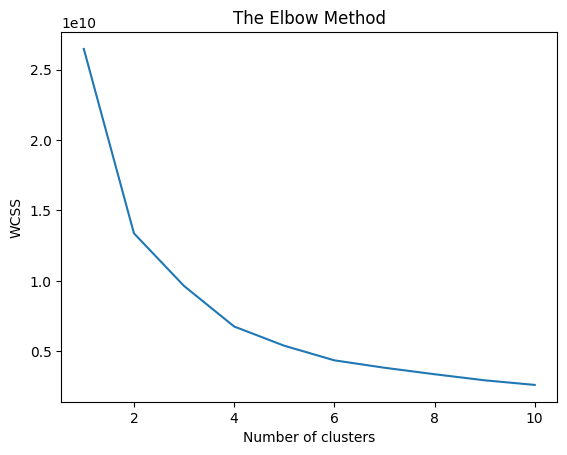

The optmal number of clusters is 6


In [56]:
wcss = elbow_method(X)[1]
n_clusters = number_clusters(wcss)
print("The optmal number of clusters is "+str(n_clusters))

In [57]:
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

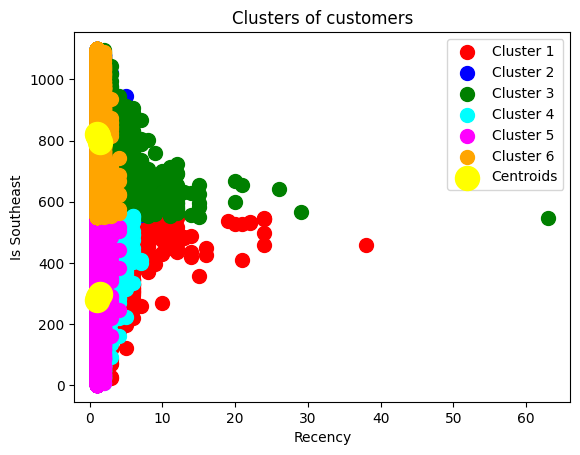

In [59]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Recency')
plt.ylabel('Is Southeast')
plt.legend()
plt.show()